In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: "%.5f" % x)

In [3]:
plt.style.use('classic')

In [4]:
glass = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/INSAID/main/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64000,4.49000,1.10000,71.78000,0.06000,8.75000,0.00000,0.00000,1
1,1.51761,13.89000,3.60000,1.36000,72.73000,0.48000,7.83000,0.00000,0.00000,1
2,1.51618,13.53000,3.55000,1.54000,72.99000,0.39000,7.78000,0.00000,0.00000,1
3,1.51766,13.21000,3.69000,1.29000,72.61000,0.57000,8.22000,0.00000,0.00000,1
4,1.51742,13.27000,3.62000,1.24000,73.08000,0.55000,8.07000,0.00000,0.00000,1


In [5]:
glass.shape

(214, 10)

In [6]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
glass.duplicated().value_counts()

False    213
True       1
dtype: int64

In [9]:
glass.drop_duplicates(keep="first", inplace=True)

In [10]:
glass.duplicated().sum()

0

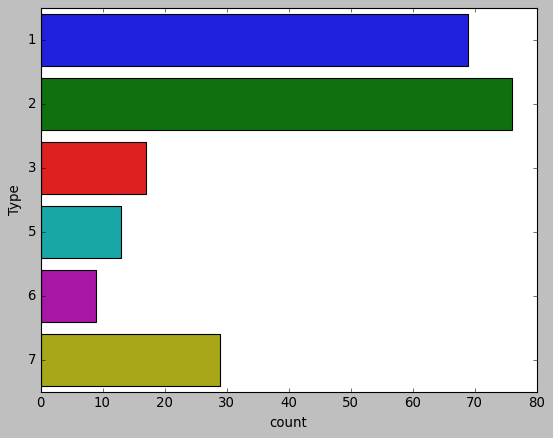

In [11]:
sns.countplot(data=glass, y=glass.Type)
plt.show()

In [12]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [13]:
cols = glass.columns.to_list()[0:-1]

In [14]:
cols

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [15]:
glass.RI.skew()

1.6480173737729908

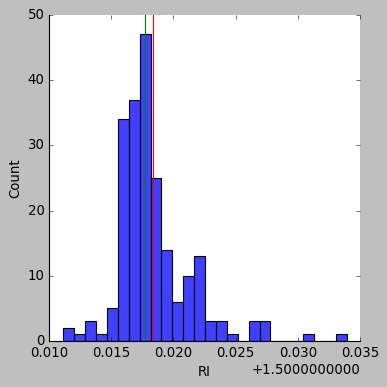

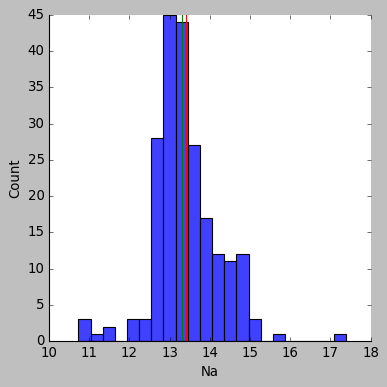

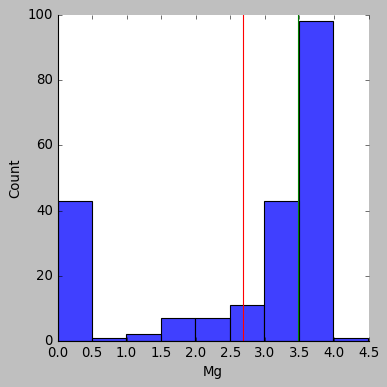

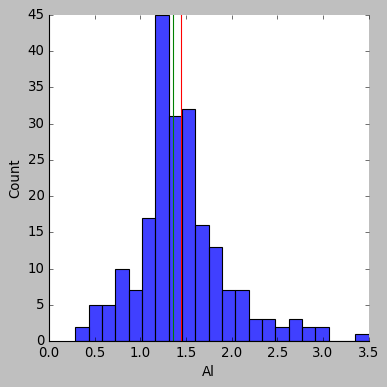

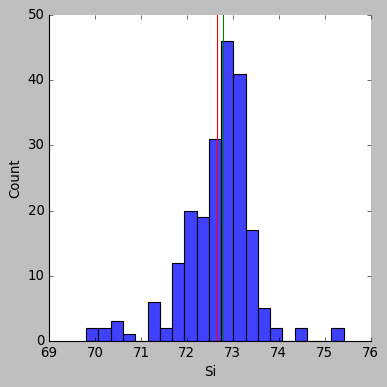

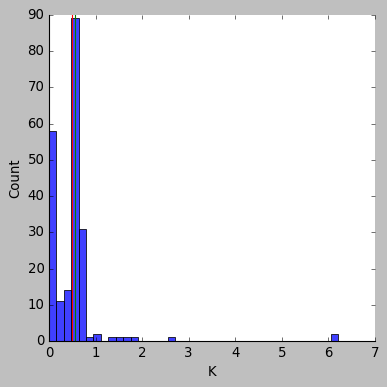

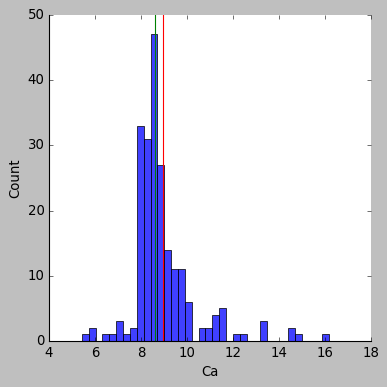

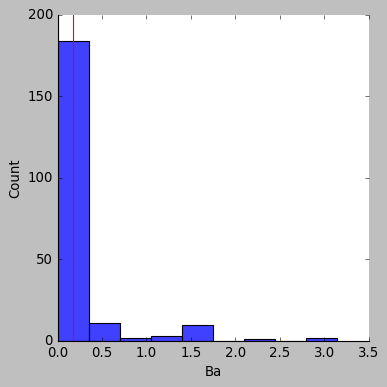

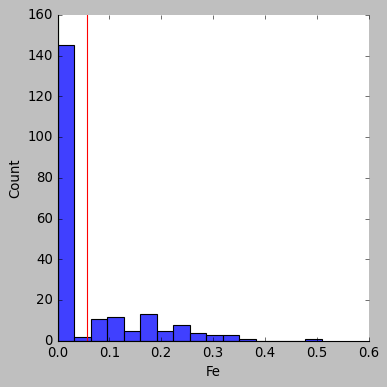

In [16]:
for c in cols:
    sns.displot(glass[c])
    plt.axvline(glass[c].mean(), color='red')
    plt.axvline(glass[c].median(), color='green')
    print("="*100)
    plt.show()

In [17]:
for c in cols:
    print(f"Skeness of the column {c} is ",glass[c].skew())
    print("="*35)

Skeness of the column RI is  1.6480173737729908
Skeness of the column Na is  0.46569850922621137
Skeness of the column Mg is  -1.1460958436967303
Skeness of the column Al is  0.9384017147473468
Skeness of the column Si is  -0.7446460155618705
Skeness of the column K is  6.545428649493799
Skeness of the column Ca is  2.050752066632569
Skeness of the column Ba is  3.406748836984873
Skeness of the column Fe is  1.747173207250088


In [18]:
def get_skeness(v):
    if v>1 or v<-1:
        return "High skewness"
    elif 0.5<v<1 or -1<v<-0.5:
        return "Moderate Skewness"
    elif -0.5<=v<=0.5:
        return "Fairly symmetric"   

In [19]:
for c in cols:
    skewness = get_skeness(glass[c].skew())
    print(f"Skeness of the column {c} is ",skewness)
    print("="*35)

Skeness of the column RI is  High skewness
Skeness of the column Na is  Fairly symmetric
Skeness of the column Mg is  High skewness
Skeness of the column Al is  Moderate Skewness
Skeness of the column Si is  Moderate Skewness
Skeness of the column K is  High skewness
Skeness of the column Ca is  High skewness
Skeness of the column Ba is  High skewness
Skeness of the column Fe is  High skewness


In [20]:
X = glass.loc[:,glass.columns != 'Type']

In [21]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64000,4.49000,1.10000,71.78000,0.06000,8.75000,0.00000,0.00000
1,1.51761,13.89000,3.60000,1.36000,72.73000,0.48000,7.83000,0.00000,0.00000
2,1.51618,13.53000,3.55000,1.54000,72.99000,0.39000,7.78000,0.00000,0.00000
3,1.51766,13.21000,3.69000,1.29000,72.61000,0.57000,8.22000,0.00000,0.00000
4,1.51742,13.27000,3.62000,1.24000,73.08000,0.55000,8.07000,0.00000,0.00000


In [22]:
y = glass.Type

In [23]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((170, 9), (43, 9), (170,), (43,))

In [26]:
for c in cols:
    skewness = get_skeness(X_train[c].skew())
    print(f"Skeness of the column {c} is ",skewness)
    print("="*35)

Skeness of the column RI is  High skewness
Skeness of the column Na is  Moderate Skewness
Skeness of the column Mg is  High skewness
Skeness of the column Al is  Moderate Skewness
Skeness of the column Si is  Moderate Skewness
Skeness of the column K is  Fairly symmetric
Skeness of the column Ca is  High skewness
Skeness of the column Ba is  High skewness
Skeness of the column Fe is  High skewness


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

In [28]:
X_train[cols]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
80,-0.88542,-0.68469,0.53795,1.56757,0.05108,0.89151,-0.71937,-0.32871,-0.57888
162,1.15977,0.92857,0.72708,-1.08830,-1.64128,-0.69366,0.10531,-0.32871,3.30298
110,2.65649,-2.66185,-2.02256,-1.39559,0.76707,-1.48625,4.01023,-0.32871,-0.57888
128,0.68729,0.15226,-0.50226,0.57985,-0.57379,0.34014,0.40840,0.20106,1.20467
96,-0.06272,-0.49061,0.61069,-0.75906,-0.36550,0.71920,0.09827,-0.32871,0.99484
129,0.52870,0.67385,-1.04055,0.49205,-1.12055,-0.14230,1.10621,-0.32871,1.30959
137,-0.49224,-0.64830,0.61069,0.36036,0.44162,0.61582,-0.62069,-0.32871,-0.57888
38,1.16638,0.95283,0.75617,-2.05408,-1.10753,-1.10719,0.40840,-0.32871,-0.57888
24,-0.46250,-0.05394,0.52340,-0.56152,0.29842,0.23676,-0.39514,-0.32871,-0.57888
69,1.45383,-0.13885,0.58159,-1.28585,-0.82114,-1.07273,0.83132,-0.32871,-0.26414


In [29]:
for c in cols:
    skewness = get_skeness(X_train[c].skew())
    print(f"Skeness of the column {c} is ",skewness)
    print("="*35)

Skeness of the column RI is  High skewness
Skeness of the column Na is  Moderate Skewness
Skeness of the column Mg is  High skewness
Skeness of the column Al is  Moderate Skewness
Skeness of the column Si is  Moderate Skewness
Skeness of the column K is  Fairly symmetric
Skeness of the column Ca is  High skewness
Skeness of the column Ba is  High skewness
Skeness of the column Fe is  High skewness


In [30]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
X_train[cols] = mms.fit_transform(X_train[cols])
X_test[cols] = mms.transform(X_test[cols])

In [31]:
for c in cols:
    skewness = get_skeness(X_train[c].skew())
    print(f"Skeness of the column {c} is ",skewness)
    print("="*35)

Skeness of the column RI is  High skewness
Skeness of the column Na is  Moderate Skewness
Skeness of the column Mg is  High skewness
Skeness of the column Al is  Moderate Skewness
Skeness of the column Si is  Moderate Skewness
Skeness of the column K is  Fairly symmetric
Skeness of the column Ca is  High skewness
Skeness of the column Ba is  High skewness
Skeness of the column Fe is  High skewness


In [32]:
for c in cols:
    skewness = get_skeness(X_test[c].skew())
    print(f"Skeness of the column {c} is ",skewness)
    print("="*35)

Skeness of the column RI is  High skewness
Skeness of the column Na is  Fairly symmetric
Skeness of the column Mg is  Moderate Skewness
Skeness of the column Al is  Moderate Skewness
Skeness of the column Si is  Fairly symmetric
Skeness of the column K is  High skewness
Skeness of the column Ca is  High skewness
Skeness of the column Ba is  High skewness
Skeness of the column Fe is  High skewness


In [33]:
## different TTS values 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=2)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

In [35]:
for c in cols:
    skewness = get_skeness(X_test[c].skew())
    print(f"Skeness of the column {c} is ",skewness)
    print("="*35)

Skeness of the column RI is  Moderate Skewness
Skeness of the column Na is  High skewness
Skeness of the column Mg is  High skewness
Skeness of the column Al is  Moderate Skewness
Skeness of the column Si is  High skewness
Skeness of the column K is  High skewness
Skeness of the column Ca is  High skewness
Skeness of the column Ba is  High skewness
Skeness of the column Fe is  High skewness


In [36]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
X_train[cols] = mms.fit_transform(X_train[cols])
X_test[cols] = mms.transform(X_test[cols])

In [37]:
for c in cols:
    skewness = get_skeness(X_test[c].skew())
    print(f"Skeness of the column {c} is ",skewness)
    print("="*35)

Skeness of the column RI is  Moderate Skewness
Skeness of the column Na is  High skewness
Skeness of the column Mg is  High skewness
Skeness of the column Al is  Moderate Skewness
Skeness of the column Si is  High skewness
Skeness of the column K is  High skewness
Skeness of the column Ca is  High skewness
Skeness of the column Ba is  High skewness
Skeness of the column Fe is  High skewness


In [38]:
## TTS values 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=25)

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[cols] = sc.fit_transform(X_train[cols])
X_test[cols] = sc.transform(X_test[cols])

In [40]:
for c in cols:
    skewness = get_skeness(X_test[c].skew())
    print(f"Skeness of the column {c} is ",skewness)
    print("="*35)

Skeness of the column RI is  High skewness
Skeness of the column Na is  Fairly symmetric
Skeness of the column Mg is  High skewness
Skeness of the column Al is  Moderate Skewness
Skeness of the column Si is  High skewness
Skeness of the column K is  High skewness
Skeness of the column Ca is  High skewness
Skeness of the column Ba is  High skewness
Skeness of the column Fe is  High skewness


In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred_test = classifier.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

In [44]:
accuracy_score(y_test,y_pred_test)

0.65625

In [45]:
accuracy_score(y_train, classifier.predict(X_train))

0.7583892617449665

In [46]:
confusion_matrix(y_pred_test, y_test)

array([[14,  7,  1,  0,  1,  1],
       [ 7, 17,  1,  2,  0,  0],
       [ 1,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  8]])

In [47]:
confusion_matrix(y_train, classifier.predict(X_train))

array([[40,  7,  0,  0,  0,  0],
       [ 5, 42,  0,  4,  0,  0],
       [10,  2,  2,  0,  0,  0],
       [ 0,  1,  0,  8,  0,  1],
       [ 1,  2,  0,  0,  4,  0],
       [ 1,  1,  0,  1,  0, 17]])

In [48]:
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           1       0.64      0.58      0.61        24
           2       0.68      0.63      0.65        27
           3       0.33      0.50      0.40         2
           5       0.33      0.50      0.40         2
           6       0.50      1.00      0.67         1
           7       0.89      1.00      0.94         8

    accuracy                           0.66        64
   macro avg       0.56      0.70      0.61        64
weighted avg       0.67      0.66      0.66        64



In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [50]:
clfs = [
    RandomForestClassifier(random_state=0, class_weight='balanced'),
    GaussianNB(),
    KNeighborsClassifier(),
    LogisticRegression(random_state=0)
]
clfs

[RandomForestClassifier(class_weight='balanced', random_state=0),
 GaussianNB(),
 KNeighborsClassifier(),
 LogisticRegression(random_state=0)]

In [51]:
for clf in clfs:
    model_name = type(clf).__name__
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    accu_score_test = accuracy_score(y_test,y_pred_test)
    accu_score_train = accuracy_score(y_train, y_pred_train)
    print("Result of the model:", clf)
    print("Train accuracy of the model is",accu_score_train)
    print("Test accuracy of the model is",accu_score_test)
    print("="*60)

Result of the model: RandomForestClassifier(class_weight='balanced', random_state=0)
Train accuracy of the model is 1.0
Test accuracy of the model is 0.828125
Result of the model: GaussianNB()
Train accuracy of the model is 0.48322147651006714
Test accuracy of the model is 0.421875
Result of the model: KNeighborsClassifier()
Train accuracy of the model is 0.7583892617449665
Test accuracy of the model is 0.65625
Result of the model: LogisticRegression(random_state=0)
Train accuracy of the model is 0.697986577181208
Test accuracy of the model is 0.671875


In [113]:
df = glass.loc[glass.Type <= 2]

In [115]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64000,4.49000,1.10000,71.78000,0.06000,8.75000,0.00000,0.00000,1
1,1.51761,13.89000,3.60000,1.36000,72.73000,0.48000,7.83000,0.00000,0.00000,1
2,1.51618,13.53000,3.55000,1.54000,72.99000,0.39000,7.78000,0.00000,0.00000,1
3,1.51766,13.21000,3.69000,1.29000,72.61000,0.57000,8.22000,0.00000,0.00000,1
4,1.51742,13.27000,3.62000,1.24000,73.08000,0.55000,8.07000,0.00000,0.00000,1


In [116]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,145.00000,145.00000,145.00000,145.00000,145.00000,145.00000,145.00000,145.00000,145.00000,145.00000
mean,1.51864,13.16717,3.26214,1.29669,72.61393,0.48834,8.93683,0.03248,0.06931,1.52414
std,0.00315,0.58823,0.93458,0.31452,0.65118,0.21517,1.44850,0.26851,0.09899,0.50115
min,1.51215,10.73000,0.00000,0.29000,69.81000,0.00000,7.08000,0.00000,0.00000,1.00000
25%,1.51674,12.85000,3.43000,1.16000,72.26000,0.39000,8.15000,0.00000,0.00000,1.00000
50%,1.51775,13.19000,3.54000,1.30000,72.78000,0.57000,8.53000,0.00000,0.00000,2.00000
75%,1.51905,13.48000,3.64000,1.49000,73.03000,0.62000,9.02000,0.00000,0.14000,2.00000
max,1.53393,14.86000,4.49000,2.12000,74.45000,1.10000,16.19000,3.15000,0.35000,2.00000


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 145
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      145 non-null    float64
 1   Na      145 non-null    float64
 2   Mg      145 non-null    float64
 3   Al      145 non-null    float64
 4   Si      145 non-null    float64
 5   K       145 non-null    float64
 6   Ca      145 non-null    float64
 7   Ba      145 non-null    float64
 8   Fe      145 non-null    float64
 9   Type    145 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 12.5 KB


In [118]:
X = df.loc[:,df.columns != 'Type']

In [119]:
X.shape

(145, 9)

In [120]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64000,4.49000,1.10000,71.78000,0.06000,8.75000,0.00000,0.00000
1,1.51761,13.89000,3.60000,1.36000,72.73000,0.48000,7.83000,0.00000,0.00000
2,1.51618,13.53000,3.55000,1.54000,72.99000,0.39000,7.78000,0.00000,0.00000
3,1.51766,13.21000,3.69000,1.29000,72.61000,0.57000,8.22000,0.00000,0.00000
4,1.51742,13.27000,3.62000,1.24000,73.08000,0.55000,8.07000,0.00000,0.00000


In [121]:
y = df.Type

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.20)

In [124]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((116, 9), (29, 9), (116,), (29,))

In [125]:
for c in cols:
    skewness = get_skeness(X_train[c].skew())
    print(f"Skeness of the column {c} is ",skewness)
    print("="*35)

Skeness of the column RI is  High skewness
Skeness of the column Na is  Fairly symmetric
Skeness of the column Mg is  High skewness
Skeness of the column Al is  Fairly symmetric
Skeness of the column Si is  Moderate Skewness
Skeness of the column K is  Moderate Skewness
Skeness of the column Ca is  High skewness
Skeness of the column Ba is  High skewness
Skeness of the column Fe is  High skewness


In [126]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(X_train,y_train)
y_pred_test = classifier2.predict(X_test)

In [127]:
y_pred_train = classifier2.predict(X_train)

In [128]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [130]:
accuracy_score_test2 = accuracy_score(y_test,y_pred_test)

In [131]:
print(accuracy_score_test2)

0.6896551724137931


In [132]:
print(accuracy_score(y_train, y_pred_train))

0.8362068965517241


In [133]:
## overfitting

In [135]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.64      0.58      0.61        12
           2       0.72      0.76      0.74        17

    accuracy                           0.69        29
   macro avg       0.68      0.67      0.68        29
weighted avg       0.69      0.69      0.69        29



In [136]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           1       0.78      0.93      0.85        57
           2       0.92      0.75      0.82        59

    accuracy                           0.84       116
   macro avg       0.85      0.84      0.84       116
weighted avg       0.85      0.84      0.83       116



In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [139]:
clfs2 = [
    KNeighborsClassifier(n_neighbors=5),
    LogisticRegression(class_weight='', random_state=5),
    GaussianNB(),
    RandomForestClassifier()
]
clfs

[RandomForestClassifier(class_weight='balanced', random_state=0),
 GaussianNB(),
 KNeighborsClassifier(),
 LogisticRegression(random_state=0)]

In [140]:
for clf in clfs:
    model_name = type(clf).__name__
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    accu_score_test = accuracy_score(y_test,y_pred_test)
    accu_score_train = accuracy_score(y_train, y_pred_train)
    print("Result of the model:", clf)
    print("Train accuracy of the model is",accu_score_train)
    print("Test accuracy of the model is",accu_score_test)
    print("="*60)

Result of the model: RandomForestClassifier(class_weight='balanced', random_state=0)
Train accuracy of the model is 1.0
Test accuracy of the model is 0.7931034482758621
Result of the model: GaussianNB()
Train accuracy of the model is 0.7586206896551724
Test accuracy of the model is 0.5862068965517241
Result of the model: KNeighborsClassifier()
Train accuracy of the model is 0.8362068965517241
Test accuracy of the model is 0.6896551724137931
Result of the model: LogisticRegression(random_state=0)
Train accuracy of the model is 0.7586206896551724
Test accuracy of the model is 0.6551724137931034
